![](pic/Sobel.png)

In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv2.imread("pic/pic.png")
cv2.imshow("pic",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

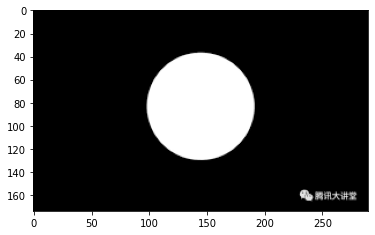

In [3]:
plt.imshow(img)

In [4]:
# 右减左 下减上
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
    · ddepth:图像的深度  -1表示核输入的深度一致
    · dx和dy分别表示水平和竖直的方向
    · ksize：卷积核的大小

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


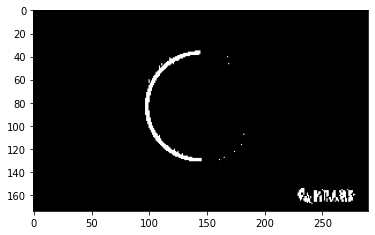

In [5]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
# cv_show(sobelx,"sobelx")
plt.imshow(sobelx)

白到黑色是正数，黑到白为负数，所有负数会被截断为0，所以要取绝对值

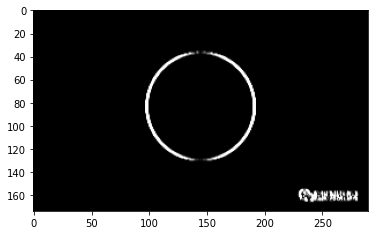

In [6]:
sobelx = cv2.convertScaleAbs(sobelx)
# cv_show(sobelx,"sobelx")
plt.imshow(sobelx)
#将为负数的转换成正数

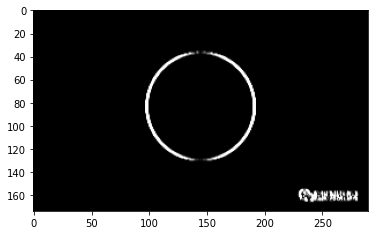

In [7]:
#计算y轴
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
plt.imshow(sobelx)

## 分别计算x和y轴最后相加

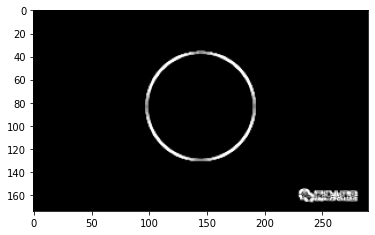

In [8]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
plt.imshow(sobelxy)

# 不建议直接计算！！！

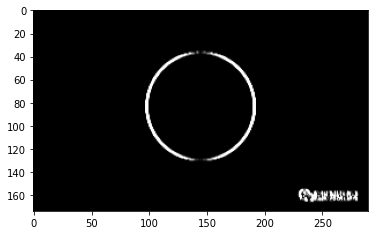

In [9]:
sobel = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobel = cv2.convertScaleAbs(sobelx)
plt.imshow(sobel)

### 图像计算边缘

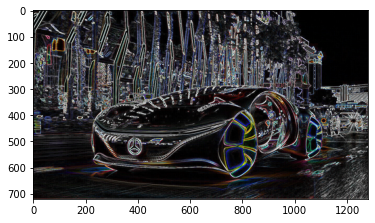

In [10]:
img = cv2.imread("pic/car.jpg")
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
plt.imshow(sobelxy)

### Scharr算子
![](pic/Scharr.png)
#### 相比于Sobel更加明显
### Laplacian算子
![](pic/Laplacian.png)

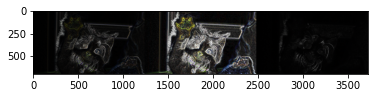

In [11]:
import numpy as np
img = cv2.imread("../基本操作/cat.jpg")
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

lapalacian = cv2.Laplacian(img,cv2.CV_64F)
lapalacian = cv2.convertScaleAbs(lapalacian)

res = np.hstack((sobelxy,scharrxy,lapalacian))
plt.imshow(res)
cv_show(res,"res")